In [90]:
print("\n-- Análise do meu histórico com PySpark + Jupyter + Pandas --\n")
print("O objetivo deste Jupyter Notebook é treinar o aprendizado de PySpark e Pandas para obter dados a partir do meu histórico de disciplinas da faculdade.\n")


-- Análise do meu histórico com PySpark + Jupyter + Pandas --

O objetivo deste Jupyter Notebook é treinar o aprendizado de PySpark e Pandas para obter dados a partir do meu histórico de disciplinas da faculdade.



In [55]:
from pyspark.sql import functions as F
from pyspark.sql import Window as Window
from pyspark.sql import types
import matplotlib.pyplot as plt

In [79]:
#reading csv file
df = spark.read.csv("data/historico_notas.utf8.csv", header=True, sep=",") 
#converting Media Final from String to Double
df = df.withColumn("Media Final", df["Media Final"].cast(types.DoubleType()))

In [80]:
#checking if the schema is ok
df.printSchema()

root
 |-- Período: string (nullable = true)
 |-- Disciplina: string (nullable = true)
 |-- Media Final: double (nullable = true)



In [124]:
df.limit(10).toPandas()

,Período,Disciplina,Media Final
0,2016.1,Algebra Linear I,5.4
1,2016.1,Geometria Analítica,6.1
2,2016.1,Matemática Discreta para Computação,6.1
3,2016.1,Computação I,8.5
4,2016.1,ICC,5.7
5,2016.2,Computação 2,7.0
6,2016.2,Cálculo I,4.2
7,2016.2,Álgebra Linear Computacional,5.2
8,2016.2,Circuitos Digitais,5.7
9,2016.2,Fundamentos de Sistemas,6.7


In [126]:
# finding the greatest grade for each semester
greatest_grade_semester_df = df.withColumn("rank", F.rank().over(Window.partitionBy("Período").orderBy(F.desc("Media Final")))).select("Período","Disciplina", "Media Final")
greatest_grade_semester_df = greatest_grade_semester_df.filter(F.col("rank") == 1).orderBy(F.col("Período"))
print("\nTabela contendo a disciplina de maior nota em cada semestre:")
greatest_grade_semester_df.toPandas()


Tabela contendo a disciplina de maior nota em cada semestre:


,Período,Disciplina,Media Final
0,2016.1,Computação I,8.5
1,2016.2,Computação 2,7.0
2,2017.1,Linguagens Formais e Autômatos,8.8
3,2017.2,Arquitetura de Computadores,6.1
4,2018.1,Inteligência Artificial,8.5
5,2018.2,Tópicos Especiais em Ciência da Computação,10.0
6,2019.1,Probabilidade e Estatística para Ciência da Co...,8.6
7,2019.2,Cálculo Aplicado,8.4


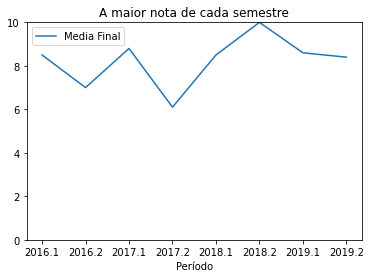

In [131]:
# ploting the graph for the greatest grade for each semester
greatest_grade_semester_pd = greatest_grade_semester_df.toPandas()
greatest_grade_semester_pd.plot(x="Período", y="Media Final", kind="line", ylim=(0,10), title="A maior nota de cada semestre")

In [132]:
# finding the average grade for each semester
avg_semester_df = df.groupBy("Período").agg(F.avg("Media Final").alias("Media")).orderBy("Período")
avg_semester_df.toPandas()

,Período,Media
0,2016.1,6.360000
1,2016.2,5.760000
2,2017.1,7.933333
3,2017.2,5.380000
4,2018.1,6.840000
5,2018.2,6.783333
6,2019.1,6.520000
7,2019.2,7.300000


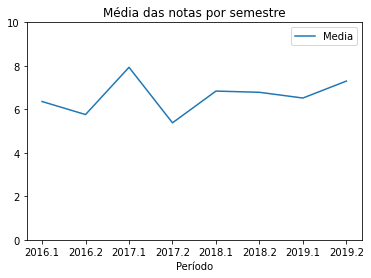

In [134]:
# ploting the graph of the average grade for each semester
avg_semester_pd = avg_semester_df.toPandas()
avg_semester_pd.plot(kind="line", x="Período", y="Media", ylim=(0,10), title="Média das notas por semestre")